In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
CV = [file for file in os.listdir() if '.txt' in file and 'CV_' in file]
dfCV = [pd.read_csv(file,delimiter='\t')for file in CV]
CVsim = [file for file in os.listdir() if '.txt' in file and 'CVsim' in file]
dfCVsim = [pd.read_csv(file,delimiter='\t')for file in CVsim]

In [40]:
CV

['CV_Fe(aqua)6_110mVs_C01.txt',
 'CV_Fe(aqua)6_220mVs_C01.txt',
 'CV_Fe(aqua)6_350mVs_C01.txt',
 'CV_Fe(aqua)6_4100mVs_C01.txt',
 'CV_Fe(aqua)6_5200mVs_C01.txt',
 'CV_Fe(aqua)6_6400mVs_C01.txt',
 'CV_Fe(CN)6_110mVs_C01.txt',
 'CV_Fe(CN)6_220mVs_C01.txt',
 'CV_Fe(CN)6_350mVs_C01.txt',
 'CV_Fe(CN)6_4100mVs_C01.txt',
 'CV_Fe(CN)6_5200mVs_C01.txt',
 'CV_Fe(CN)6_6400mVs_C01.txt',
 'CV_Fe(phen)3_110mVs_C01.txt',
 'CV_Fe(phen)3_220mVs_C01.txt',
 'CV_Fe(phen)3_350mVs_C01.txt',
 'CV_Fe(phen)3_4100mVs_C01.txt',
 'CV_Fe(phen)3_5200mVs_C01.txt',
 'CV_Fe(phen)3_6400mVs_C01.txt']

In [12]:
dfCVsim[0]['I/mA']

0       0.000000e+00
1       3.020705e-09
2       7.103839e-10
3       1.198499e-09
4       9.390870e-10
            ...     
1995   -5.377455e-03
1996   -5.368919e-03
1997   -5.360407e-03
1998   -5.351918e-03
1999   -5.343453e-03
Name: I/mA, Length: 2000, dtype: float64

In [36]:
dfaqox = dfCVsim[0][(dfCVsim[0]['I/mA']>=0.0)]
dfaqred = dfCVsim[1][(dfCVsim[1]['I/mA']<=0.0)][1:]
dfCN = dfCVsim[2]
dfphen = dfCVsim[3]

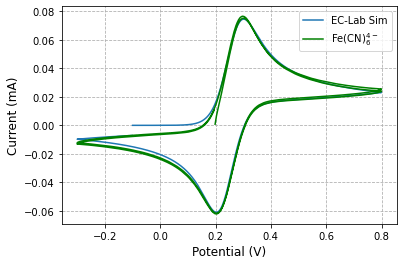

In [61]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel('Potential (V)',fontsize='large')
plt.ylabel('Current (mA)',fontsize='large')
plt.plot(dfCN['Ewe/V'],dfCN['I/mA'], label = 'EC-Lab Sim')
plt.plot(dfCV[9]['Ewe/V'],dfCV[9]['<I>/mA'],'g', label = r'Fe(CN)$_6^{4-}$')
plt.legend()
plt.savefig('CVsim_Fe(CN)6_100.png',bbox_inches = 'tight', format='png')

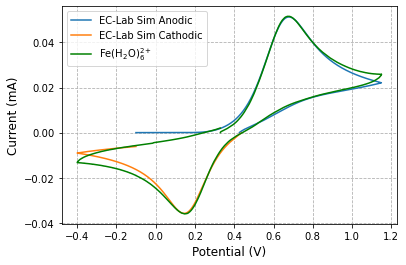

In [66]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel('Potential (V)',fontsize='large')
plt.ylabel('Current (mA)',fontsize='large')
plt.plot(dfaqox['Ewe/V'],dfaqox['I/mA'], label = 'EC-Lab Sim Anodic')
plt.plot(dfaqred['Ewe/V'],dfaqred['I/mA'], label = 'EC-Lab Sim Cathodic')
plt.plot(dfCV[3]['Ewe/V'],dfCV[3]['<I>/mA'],'g',label =r'Fe(H$_2$O)$_6^{2+}$')
plt.legend()
plt.savefig('CVsim_Fe(aq)6_100.png',bbox_inches = 'tight', format='png')

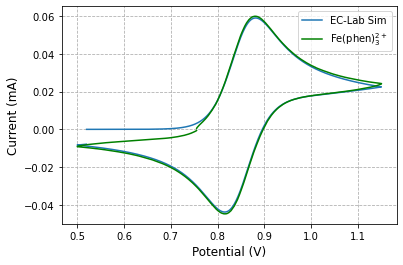

In [63]:
plt.clf()
plt.figure(num=1, figsize=[10,8])
plt.grid(linestyle = '--')
plt.xlabel('Potential (V)',fontsize='large')
plt.ylabel('Current (mA)',fontsize='large')
plt.plot(dfphen['Ewe/V'],dfphen['I/mA'], label = 'EC-Lab Sim')
plt.plot(dfCV[15]['Ewe/V'],dfCV[15]['<I>/mA'],'g',label = r'Fe(phen)$_3^{2+}$')
plt.legend()
plt.savefig('CVsim_Fe(phen)3_100.png',bbox_inches = 'tight', format='png')

In [32]:
def plotfiles(files):
    labels = []
    plt.clf()
    plt.figure(num=1, figsize=[10,8])
    plt.grid(linestyle = '--')
    plt.xlabel('Potential (V)',fontsize='large')
    plt.ylabel('Current (mA)',fontsize='large')
    for name in files:
        start = str.find(name,'CV_')
        end = str.find(name[start+3:],'_')
        if name[start+3:end+3] not in labels:
            labels.append(name[start+3:end+3])
    for leg in labels:
        plt.clf()
        plt.figure(num=1, figsize=[10,8])
        plt.grid(linestyle = '--')
        #plt.title(leg)
        plt.xlabel('Potential (V)',fontsize='large')
        plt.ylabel('Current (mA)',fontsize='large')
        for file in files: 
            if leg in file:
                df_all = pd.read_csv(file,delimiter='\t')
                df = df_all[df_all['cycle number']==1]
                start = str.find(file,'CV_')
                end = file.find('mVs_',start+3)
                plt.plot(df['Ewe/V'],df['<I>/mA'],label = file[file.find('_',start+3,end)+2:end] + ' mV/s')
                plt.legend()
                image = file.replace("txt","png")
                plt.savefig(image, bbox_inches = 'tight', format='png')

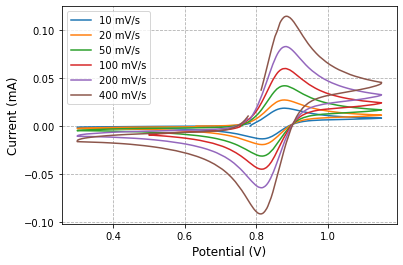

In [33]:
plotfiles(CV)

In [53]:
def Enaat(files):
    nu = [0.010,0.020,0.050,0.100,0.200,0.400]
    names = ['Fe(aq)6','Fe(CN)6','Fe(phen)3']
    labels = []
    Ezero = []
    for name in files:
        start = str.find(name,'CV_')
        if name[start+3:start+8] not in labels:
            labels.append(name[start+3:start+8])
    for n,leg in enumerate(labels):
        E = []
        Ep = []
        ip = []
        for file in files: 
            if leg in file:
                df_all = pd.read_csv(file,delimiter='\t')
                df = df_all[df_all['cycle number']==1]
                maximum = df['Ewe/V'][df['<I>/mA'].idxmax]
                minimum = df['Ewe/V'][df['<I>/mA'].idxmin]
                avg = 0.5*(maximum + minimum)
                E.append(avg)
                maxi = df['<I>/mA'][df['<I>/mA'].idxmax]
                mini = df['<I>/mA'][df['<I>/mA'].idxmin]
                ip.append(maxi)
                Ep.append(maximum)
                #print(maximum-minimum)          
        naat = sum(E)/len(E)
        Ezero.append(naat)
        #plt.plot(np.sqrt(nu),ip, label = names[n])
        #plt.scatter(np.sqrt(nu),ip)
        plt.plot(Ep - naat,np.log(ip),label = names[n])
        A = np.vstack([Ep-naat, np.ones(len(Ep))]).T
        bestfit = np.linalg.lstsq(A,np.log(ip),rcond = None)
        m,b = np.around(bestfit[0],4)
        resid = np.around(bestfit[1],4)
        R2 = np.around(1-resid/(len(Ep)*np.var(np.log(ip))),4)
        plt.plot(Ep-naat,m*(Ep-naat)+b,'r',linestyle='--', label = 'y ='+str(m)+'x + '+str(b)+ '\n'
         'R-squared = ' +str(R2))
        plt.legend()
    return Ezero, labels

([0.4130609741666667, 0.2544156475, 0.8482755716666666],
 ['Fe(aq', 'Fe(CN', 'Fe(ph'])

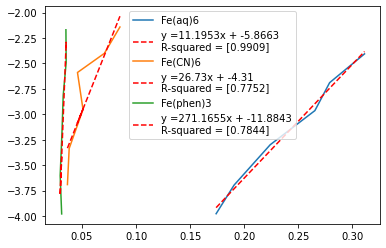

In [54]:
Enaat(CV)

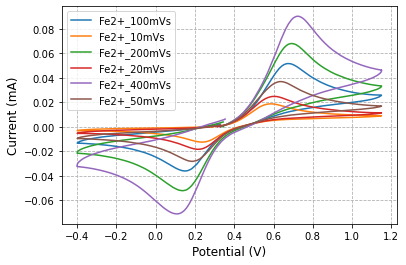

In [22]:
plotfiles(CV)